In [15]:
import config 
import json
import requests 
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re

In [2]:
url = f'https://api.nytimes.com/svc/mostpopular/v2/viewed/1.json?api-key={config.API_KEY}'
response1 = requests.get(url).json()

# Popular Articles on New York Times

In [ ]:
popular_titles = []

for i in range(len(response1['results'])):
    popular_titles.append(response1['results'][i]['title'])

In [ ]:

for i in range(len(popular_titles)):
    print(f'{i+1}. {popular_titles[i]}')

# Keywords in Top 20 Most Popular NYT Articles

In [3]:
popular_keywords = []

for i in range(len(response1['results'])):
    popular_keywords.append(response1['results'][i]['adx_keywords'])

In [ ]:
popular_keywords_list = []
popular_keywords_list2 = []
popular_keywords_list3 = []

# seperate keywords wiht delimter of ;
for i in range(len(popular_keywords)):
    popular_keywords_list.append(popular_keywords[i].split(';'))

# flatten lists generated into one master list
for lists in popular_keywords_list:
    for items in lists:
        popular_keywords_list2.append(items)
print(popular_keywords_list2)

# Split any key word phrases into the individual words
for i in range(len(popular_keywords_list2)):
    popular_keywords_list3 += (popular_keywords_list2[i].split())

In [31]:
# sort the keyword list 
popular_keywords_list3 = (sorted(popular_keywords_list3,reverse=True))

# create a dictionary of words and number of times they're repeated
keyword_count = dict(Counter(popular_keywords_list3))

# sorts the dictionary by the key value, number of duplicates
keyword_count2 = dict(sorted(keyword_count.items(),key=lambda item: item[1]))

for key in keyword_count2.copy():
    if re.search("^\W",key):
        keyword_count2.pop(key)
    elif key == 'and' or key == 'of':
        keyword_count2.pop(key)


keys = list(keyword_count2)[-10:]
values = list(keyword_count2.values())[-10:]

1. States was a keyword 13 times in the popular NYT articles today
2. Coronavirus was a keyword 11 times in the popular NYT articles today
3. United was a keyword 10 times in the popular NYT articles today
4. Government was a keyword 6 times in the popular NYT articles today
5. Politics was a keyword 6 times in the popular NYT articles today
6. Content was a keyword 5 times in the popular NYT articles today
7. Type: was a keyword 5 times in the popular NYT articles today
8. Variant was a keyword 5 times in the popular NYT articles today
9. Immunization was a keyword 4 times in the popular NYT articles today
10. Vaccination was a keyword 4 times in the popular NYT articles today


Text(0.5, 1.0, 'Most Popular Keywords in Top 20 NYT Articles')

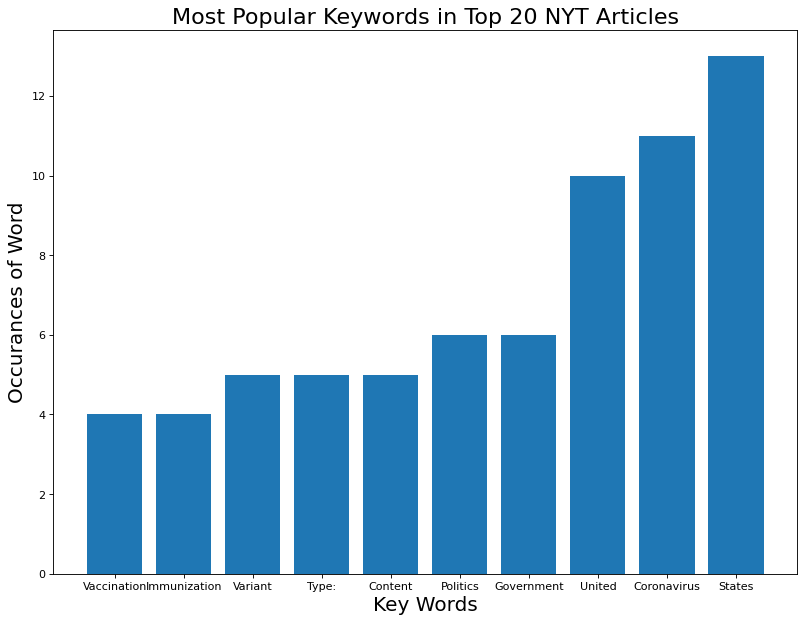

In [32]:
# prints a list of the top 10 keywords 
for i in range(len(keys)):
    print(f'{i+1}. {keys[-(i+1)]} was a keyword {values[-(i+1)]} times in the popular NYT articles today')

# creates a bar chart of the top 10 keywords 
figure(figsize=(12,9), dpi=80)
bar = plt.bar(keys,values)
plt.xlabel('Key Words',size=18)
plt.ylabel('Occurances of Word',size=18)
plt.title('Most Popular Keywords in Top 20 NYT Articles',size=20)